In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
def load_npy_files(base_dir, epoch, batch, layer):
    """
    Load all .npy files from a specific epoch, batch, and layer directory.

    Args:
        base_dir (str): The base directory containing all the runs.
        epoch (str): The epoch directory name (e.g., 'epoch_01').
        batch (str): The batch directory name (e.g., 'batch_0').
        layer (str): The layer directory name (e.g., 'layer_00').

    Returns:
        list: A list of numpy arrays loaded from .npy files in the specified layer directory.
    """
    # Construct the directory path
    target_dir = os.path.join(base_dir, epoch, batch, layer)
    
    # Check if the directory exists
    if not os.path.exists(target_dir):
        raise FileNotFoundError(f"Directory {target_dir} does not exist.")
    
    # List all .npy files in the directory
    npy_files = [f for f in os.listdir(target_dir) if f.endswith('.npy')]
    
    # Load each .npy file and store it in a list
    data = []
    for npy_file in npy_files:
        file_path = os.path.join(target_dir, npy_file)
        data.append(np.load(file_path))
    
    return data


In [3]:
# Example usage
# base_dir = 'path/to/run_06'
base_dir = os.path.join(os.getcwd(), 'run best')

# Now base_dir contains the full path to 'run_06'
print(f"Base directory: {base_dir}")
epoch = 'epoch 01'  # Replace with your specific epoch
batch = 'batch 0'   # Replace with your specific batch
layer = 'layer 03'  # Replace with your specific layer

npy_data = load_npy_files(base_dir, epoch, batch, layer)

# Example to print the number of .npy files loaded
print(f"Number of .npy files loaded: {len(npy_data)}")

# Optionally, process or inspect the data
for i, array in enumerate(npy_data):
    # print(array)
    print(f"Array {i+1} shape: {array.shape}")



Base directory: /Users/yajatkapoor/Desktop/IITD SEMESTER-7/ELD431/BTP-Transformer-explainability/run best


FileNotFoundError: Directory /Users/yajatkapoor/Desktop/IITD SEMESTER-7/ELD431/BTP-Transformer-explainability/run best/epoch 01/batch 0/layer 03 does not exist.

In [ ]:


def heat_map(target_data,img_idx):
    attention_scores =target_data
    attention_scores=target_data[img_idx]

    # Average over the first dimension (samples), resulting in shape (8, 65, 64)
    # average_attention = attention_scores.mean(axis=0)

    # Determine the grid size
    # num_heads = average_attention.shape[0]
    # num_heads = attention_scores.shape[0]
    num_heads=4
    grid_size = 3
    # Create a figure for the grid of plots
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot each head's attention heatmap
    for i in range(num_heads):
  
        sns.heatmap(attention_scores[i], annot=False,cmap='viridis',cbar=True,ax=axes[i])

        axes[i].set_title(f'Head {i + 1}')
        axes[i].set_xlabel('Key Tokens')
        axes[i].set_ylabel('Query Tokens')

    # Hide any unused subplots
    for j in range(num_heads, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

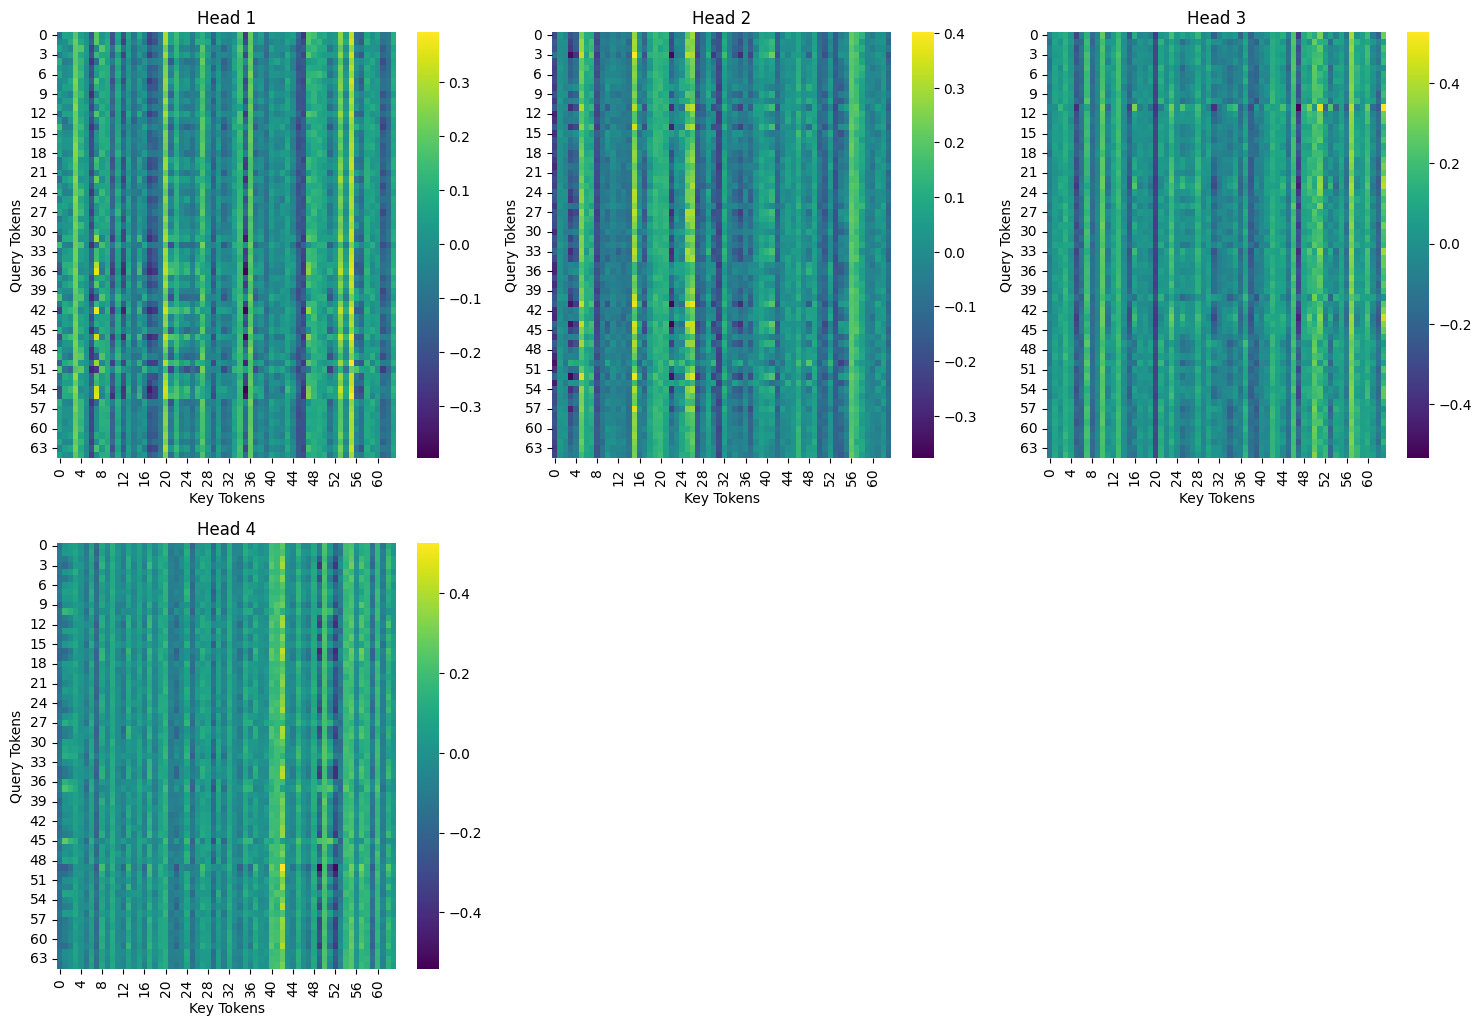

In [ ]:
heat_map(npy_data[0],2)